In [204]:
#Import niezbednych bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sqlite3
sns.set_style('whitegrid')
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [165]:
#import pliku customers
customers = pd.read_csv('customer.txt', sep='\t', encoding='latin1');
customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189559 entries, 0 to 189558
Data columns (total 4 columns):
customerid     189559 non-null int64
householdid    189559 non-null int64
gender         173355 non-null object
firstname      186644 non-null object
dtypes: int64(2), object(2)
memory usage: 5.8+ MB


,customerid,householdid,gender,firstname
0,174596,53949999,M,DANIEL
1,68239,49927024,M,JIM
2,10203,20914414,F,DONNA
3,174288,53957047,F,DIONE
4,68099,49927024,M,JIM


In [166]:
#import pliku orderline
orderlines = pd.read_csv('orderline.txt', sep='\t', encoding='latin1');
orderlines.info()
orderlines.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286017 entries, 0 to 286016
Data columns (total 8 columns):
orderlineid    286017 non-null int64
orderid        286017 non-null int64
productid      286017 non-null int64
shipdate       286017 non-null object
billdate       286017 non-null object
unitprice      281033 non-null float64
numunits       286017 non-null int64
totalprice     286017 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 17.5+ MB


,orderlineid,orderid,productid,shipdate,billdate,unitprice,numunits,totalprice
0,1010561,1006414,10834,2011-03-07 00:00:00,2011-03-08 00:00:00,18.00,1,18.00
1,1010562,1006541,11052,2011-01-19 00:00:00,2011-01-20 00:00:00,10.00,2,20.00
2,1010563,1006542,11070,2011-01-19 00:00:00,2011-01-20 00:00:00,19.12,1,19.12
3,1010564,1010154,11196,2009-11-19 00:00:00,2009-11-20 00:00:00,14.95,1,14.95
4,1010565,1009110,11048,2009-11-11 00:00:00,2009-11-12 00:00:00,10.00,2,20.00


In [167]:
#import pliku product
products = pd.read_csv('product.txt', sep='\t', encoding='latin1');
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4040 entries, 0 to 4039
Data columns (total 6 columns):
PRODUCTID           4040 non-null int64
PRODUCTNAME         0 non-null float64
PRODUCTGROUPCODE    4040 non-null object
PRODUCTGROUPNAME    4039 non-null object
INSTOCKFLAG         4040 non-null object
FULLPRICE           4040 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 189.5+ KB


,PRODUCTID,PRODUCTNAME,PRODUCTGROUPCODE,PRODUCTGROUPNAME,INSTOCKFLAG,FULLPRICE
0,10001,NaN,CA,CALENDAR,N,15
1,10002,NaN,CA,CALENDAR,N,10
2,10003,NaN,CA,CALENDAR,N,10
3,10004,NaN,BK,BOOK,Y,90
4,10005,NaN,BK,BOOK,Y,16


In [168]:
#import pliku campaign
campaign  = pd.read_csv('campaign.txt', sep='\t', encoding='latin1');
campaign.info()
campaign.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 5 columns):
campaignid          239 non-null int64
campaignname        0 non-null float64
channel             239 non-null object
discount            239 non-null int64
freeshippingflag    239 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 9.4+ KB


,campaignid,campaignname,channel,discount,freeshippingflag
0,2001,NaN,PARTNER,0,N
1,2002,NaN,AD,0,N
2,2003,NaN,PARTNER,0,N
3,2004,NaN,PARTNER,0,N
4,2005,NaN,PARTNER,0,N


In [169]:
#import pliku orders
orders = pd.read_csv('orders.txt', sep='\t', encoding='latin1');
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192983 entries, 0 to 192982
Data columns (total 11 columns):
orderid          192983 non-null int64
customerid       192983 non-null int64
campaignid       192983 non-null int64
orderdate        192983 non-null object
city             192964 non-null object
state            191864 non-null object
zipcode          192837 non-null object
paymenttype      192983 non-null object
totalprice       192983 non-null float64
numorderlines    192983 non-null int64
numunits         192983 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 16.2+ MB


,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits
0,1002854,45978,2141,2009-10-13 00:00:00,NEWTON,MA,02459,VI,190.00,3,3
1,1002855,125381,2173,2009-10-13 00:00:00,NEW ROCHELLE,NY,10804,VI,10.00,1,1
2,1002856,103122,2141,2011-06-02 00:00:00,MIAMI,FL,33137,AE,35.22,2,2
3,1002857,130980,2173,2009-10-14 00:00:00,E RUTHERFORD,NJ,07073,AE,10.00,1,1
4,1002886,48553,2141,2010-11-19 00:00:00,BALTIMORE,MD,21218,VI,10.00,1,1


In [170]:
#Laczenie tabel
ordersCustomer = orders.merge(customers, on='customerid')
ordersCustomerCampaign = ordersCustomer.merge(campaign, on='campaignid')
ordersCustomerCampaign.head()

,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits,householdid,gender,firstname,campaignname,channel,discount,freeshippingflag
0,1002854,45978,2141,2009-10-13 00:00:00,NEWTON,MA,02459,VI,190.00,3,3,18991234,M,LOUIS,NaN,PARTNER,10,N
1,1002856,103122,2141,2011-06-02 00:00:00,MIAMI,FL,33137,AE,35.22,2,2,36204911,NaN,MERRILL,NaN,PARTNER,10,N
2,1002886,48553,2141,2010-11-19 00:00:00,BALTIMORE,MD,21218,VI,10.00,1,1,19227025,NaN,T.,NaN,PARTNER,10,N
3,1003044,130970,2141,2010-11-22 00:00:00,BLOOMFIELD,NJ,07003,AE,10.00,1,1,36191206,F,WINIFRED,NaN,PARTNER,10,N
4,1003046,21927,2141,2010-11-22 00:00:00,WACO,TX,76710,MC,17.50,1,1,19086510,F,JUNE,NaN,PARTNER,10,N


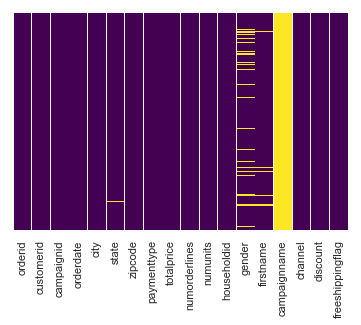

In [171]:
#Mapa pustych pol
sns.heatmap(data=ordersCustomerCampaign.isnull(), yticklabels=False, 
            cbar=False, cmap='viridis' )

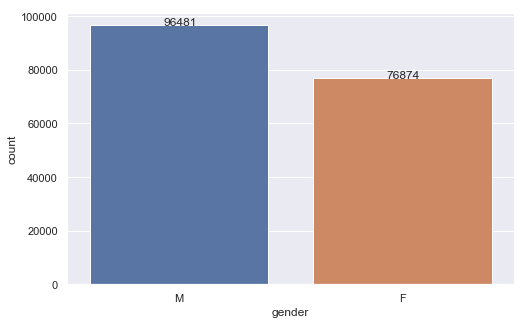

In [172]:
#Sprawdzenie rozkladu plci
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.countplot(x="gender", data=ordersCustomerCampaign)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()))
plt.show()

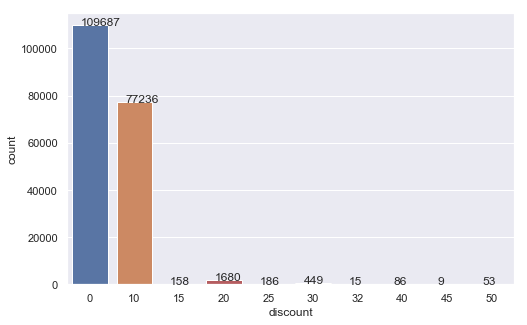

In [173]:
#Sprwadzenie rozkladu obnizek cen
ax = sns.countplot(x="discount", data=ordersCustomerCampaign)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()))
plt.show()

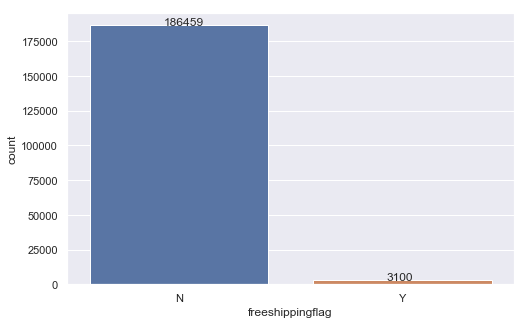

In [174]:
#Sprwadzenie rozkladu darmowej dostawy
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.countplot(x="freeshippingflag", data=ordersCustomerCampaign)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()))
plt.show()

In [175]:
#Tworzenie ramki danych
DaneDoAnalizy = ordersCustomerCampaign.reset_index()
DaneDoAnalizy = pd.DataFrame(ordersCustomerCampaign, columns=['gender', 'discount','freeshippingflag','totalprice','numunits'])
DaneDoAnalizy.head()

,gender,discount,freeshippingflag,totalprice,numunits
0,M,10,N,190.00,3
1,NaN,10,N,35.22,2
2,NaN,10,N,10.00,1
3,F,10,N,10.00,1
4,F,10,N,17.50,1


In [176]:
DaneDoAnalizy = DaneDoAnalizy.dropna()
DaneDoAnalizy.info()
DaneDoAnalizy

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173355 entries, 0 to 189557
Data columns (total 5 columns):
gender              173355 non-null object
discount            173355 non-null int64
freeshippingflag    173355 non-null object
totalprice          173355 non-null float64
numunits            173355 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.9+ MB


,gender,discount,freeshippingflag,totalprice,numunits
0,M,10,N,190.00,3
3,F,10,N,10.00,1
4,F,10,N,17.50,1
5,M,10,N,59.80,4
7,M,10,N,0.00,2
8,F,10,N,18.00,1
9,M,10,N,34.90,3
10,F,10,N,36.00,2
11,F,10,N,18.00,1
12,M,10,N,18.00,1


In [177]:
#Zmiana wartosci numunits na 0, jesli liczba sztuk jest mniejsza lub rowna 1 lub na 1, jesli jest wieksza niz 1
DaneDoAnalizy['numunits'] = DaneDoAnalizy['numunits'].mask(DaneDoAnalizy['numunits'] <= 1, 0)
DaneDoAnalizy['numunits'] = DaneDoAnalizy['numunits'].mask(DaneDoAnalizy['numunits'] > 1, 1)
DaneDoAnalizy

,gender,discount,freeshippingflag,totalprice,numunits
0,M,10,N,190.00,1
3,F,10,N,10.00,0
4,F,10,N,17.50,0
5,M,10,N,59.80,1
7,M,10,N,0.00,1
8,F,10,N,18.00,0
9,M,10,N,34.90,1
10,F,10,N,36.00,1
11,F,10,N,18.00,0
12,M,10,N,18.00,0


In [178]:
DaneDoAnalizy = DaneDoAnalizy.rename(columns={'freeshippingflag_Y': 'freeshippingflag', 'gender_M': 'gender'})
DaneDoAnalizy.info

<bound method DataFrame.info of        gender  discount freeshippingflag  totalprice  numunits
0           M        10                N      190.00         1
3           F        10                N       10.00         0
4           F        10                N       17.50         0
5           M        10                N       59.80         1
7           M        10                N        0.00         1
8           F        10                N       18.00         0
9           M        10                N       34.90         1
10          F        10                N       36.00         1
11          F        10                N       18.00         0
12          M        10                N       18.00         0
13          M        10                N       22.50         0
14          F        10                N       10.00         0
15          F        10                N       45.00         1
16          F        10                N       15.00         1
17          M        10

In [236]:
#zamieniamy wartosci gender i shipping flag na 0 i 1
DaneDoAnalizy = pd.get_dummies(DaneDoAnalizy, columns=['gender'], drop_first=True)
DaneDoAnalizy = pd.get_dummies(DaneDoAnalizy, columns=['freeshippingflag'], drop_first=True)


KeyError: "['gender'] not in index"

In [237]:
#Zmiana obnizki na wartosc 0 jesli jest mniejsza niz 10, a jesli wieksza to 1
DaneDoAnalizy['discount'] = dane['discount'].mask(DaneDoAnalizy['discount'] < 10 , 0)
DaneDoAnalizy['discount'] = dane['discount'].mask(DaneDoAnalizy['discount'] >= 10 , 1)
DaneDoAnalizy

,discount,totalprice,numunits,gender_M,freeshippingflag_Y
0,10,1.0,1,1,0
3,10,0.0,0,0,0
4,10,0.0,0,0,0
5,10,1.0,1,1,0
7,10,0.0,1,1,0
8,10,0.0,0,0,0
9,10,1.0,1,1,0
10,10,1.0,1,0,0
11,10,0.0,0,0,0
12,10,0.0,0,1,0


In [238]:
#Zmienianie wartosci totalpricem jesli mniejsza od 30 to 0, jezeli wieksza lub rowna 30 to 1
DaneDoAnalizy['totalprice'] = DaneDoAnalizy['totalprice'].mask(DaneDoAnalizy['totalprice'] < 30 , 0)
DaneDoAnalizy['totalprice'] = DaneDoAnalizy['totalprice'].mask(DaneDoAnalizy['totalprice'] >= 30 , 1)
DaneDoAnalizy

,discount,totalprice,numunits,gender_M,freeshippingflag_Y
0,10,0.0,1,1,0
3,10,0.0,0,0,0
4,10,0.0,0,0,0
5,10,0.0,1,1,0
7,10,0.0,1,1,0
8,10,0.0,0,0,0
9,10,0.0,1,1,0
10,10,0.0,1,0,0
11,10,0.0,0,0,0
12,10,0.0,0,1,0


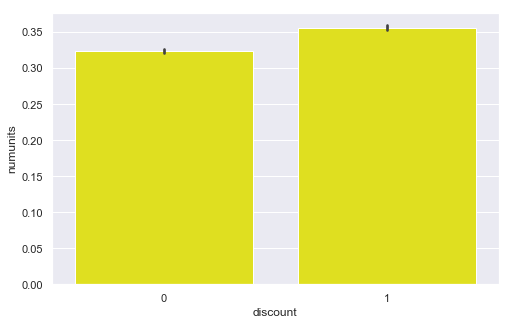

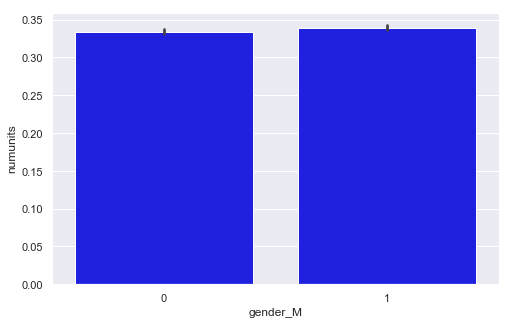

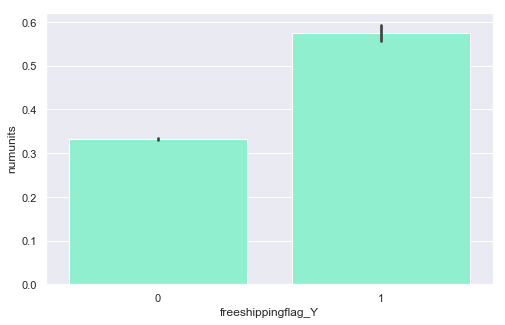

In [184]:
#jezeli jest obnizka to mamy wieksza liczbe kupionych sztuk
sns.barplot('discount', 'numunits', data=DaneDoAnalizy, color="yellow")
plt.show()
#kobiety i mezczyni kupuja mniej wiecej podobna liczbe sztuk
sns.barplot('gender_M', 'numunits', data=DaneDoAnalizy, color="blue")
plt.show()
#Darmowa dostawa ma wplyw na liczbe sztuk
sns.barplot('freeshippingflag_', 'numunits', data=DaneDoAnalizy, color="aquamarine")
plt.show()

In [188]:
#tworzymy zbior treningowy
train = pd.DataFrame(DaneDoAnalizy, columns=['gender_M','discount','numunits','freeshippingflag_Y','totalprice'])
train.head()


,gender_M,discount,numunits,freeshippingflag_Y,totalprice
0,1,1,1,0,1.0
3,0,1,0,0,0.0
4,0,1,0,0,0.0
5,1,1,1,0,1.0
7,1,1,1,0,0.0


In [189]:
#macierz korelacji Pearsona, jak silne sa korelacje pomiedzy zmiennymi. Najsilniejsza to numunits i total price 33%, ale to wciąz slaba korelacja
korelacja = train.corr('pearson')
korelacja

,gender_M,discount,numunits,freeshippingflag_Y,totalprice
gender_M,1.000000,-0.039557,0.005724,-0.029875,0.031394
discount,-0.039557,1.000000,0.033544,0.066946,0.053266
numunits,0.005724,0.033544,1.000000,0.064888,0.331714
freeshippingflag_Y,-0.029875,0.066946,0.064888,1.000000,0.051906
totalprice,0.031394,0.053266,0.331714,0.051906,1.000000


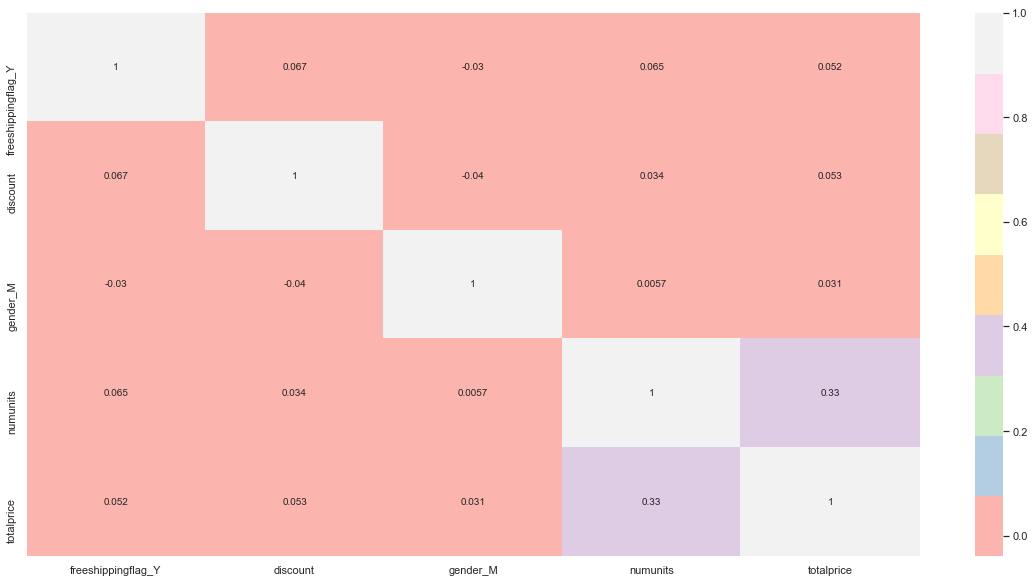

In [224]:
#Mapa cieplna korelacji
wybrane_tabele = ['freeshippingflag_Y','discount','gender_M','numunits','totalprice']
X = train[wybrane_tabele]

plt.subplots(figsize=(20, 10))
sns.heatmap(X.corr(), annot=True, cmap="Pastel1")
plt.show()

In [192]:
#Tworzenie zmiennej objasnianej y i objasniajacych x poprzez drop tabeli numunits
X = train.drop('numunits', axis = 1)
y = train['numunits']

In [211]:
#Nadawanie parametrow testowi
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20)

In [212]:
#Uzycie regresji logistycznej
logR = LogisticRegression()
logR.fit(X_train, y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [213]:
predictions = logR.predict(X_test)

In [214]:
#Wyswietlamy raport klasyfikacji. Wartosc predykcji micro i macro na dobrym poziomie 70%
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75     22946
           1       0.53      0.62      0.57     11725

   micro avg       0.69      0.69      0.69     34671
   macro avg       0.66      0.67      0.66     34671
weighted avg       0.70      0.69      0.69     34671



In [215]:
#Macierz  konfuzji
print(confusion_matrix(y_test, predictions))

[[16505  6441]
 [ 4404  7321]]


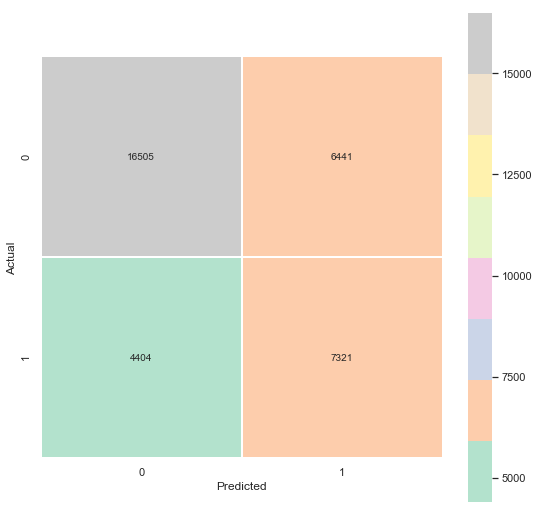

In [225]:
#Tworzenie graficznej mapy macierzy konfuzji

macierz_konfuzji = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(macierz_konfuzji, annot=True, fmt=".0f", linewidths=.9, square = True, cmap = 'Pastel2');
plt.ylabel('Actual');
plt.xlabel('Predicted');

In [219]:
#Okreslenie dokladnosci przewidywan

X_train = train.drop("numunits",axis=1)
Y_train = train["numunits"]
X_test = train.drop("numunits",axis=1)
X_train.shape , Y_train.shape , X_test.shape

logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
Y_pred = logmodel.predict(X_test)
acc_log = round(logmodel.score(X_train , Y_train) * 100, 2)
acc_log

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


68.75

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train/Test split results:
LogisticRegression accuracy is 0.684
LogisticRegression log_loss is 0.591
LogisticRegression auc is 0.673


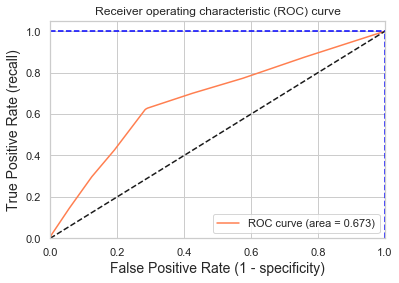

Using a threshold of 0.201 guarantees a sensitivity of 1.000 and a specificity of 0.000, i.e. a false positive rate of 100.00%.


In [234]:
X = train.drop('numunits', axis = 1)
y = train['numunits']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=40)

# sprawdzenie wyników klasyfikacji 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index pierwszego progu, gdzie sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))
